In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# preprocess data
x_train = x_train.reshape(60000, 28, 28, 1) / 255.0
x_test = x_test.reshape(10000, 28, 28, 1) / 255.0
y_train = y_train.reshape(60000, 1)
y_test = y_test.reshape(10000, 1)

In [4]:
# build model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', # learning_rate=1e-3 by default
              loss='sparse_categorical_crossentropy', # from_logits=True is applied
              metrics=['accuracy'])

In [5]:
# train model
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 0.2541 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0860 - accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0611 - accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0499 - accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0410 - accuracy: 0.9885


In [6]:
# save model (Optional)
model.save('mnist_sigmoid.h5')

In [ ]:
# load model (Optional)
model = load_model('mnist.h5')
loss, accuracy = model.evaluate(x_test, y_test)

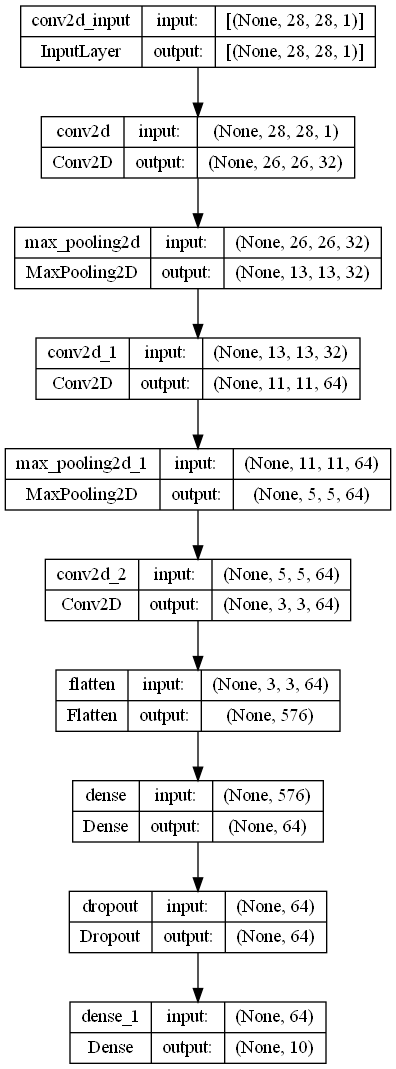

In [8]:
# Visualize the model's layers
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
# evaluate model
loss, accuracy = model.evaluate(x_test, y_test)
print('loss: ', loss)
print('accuracy: ', accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0329 - accuracy: 0.9909
loss:  0.03290579095482826
accuracy:  0.9908999800682068


In [10]:
# predict
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


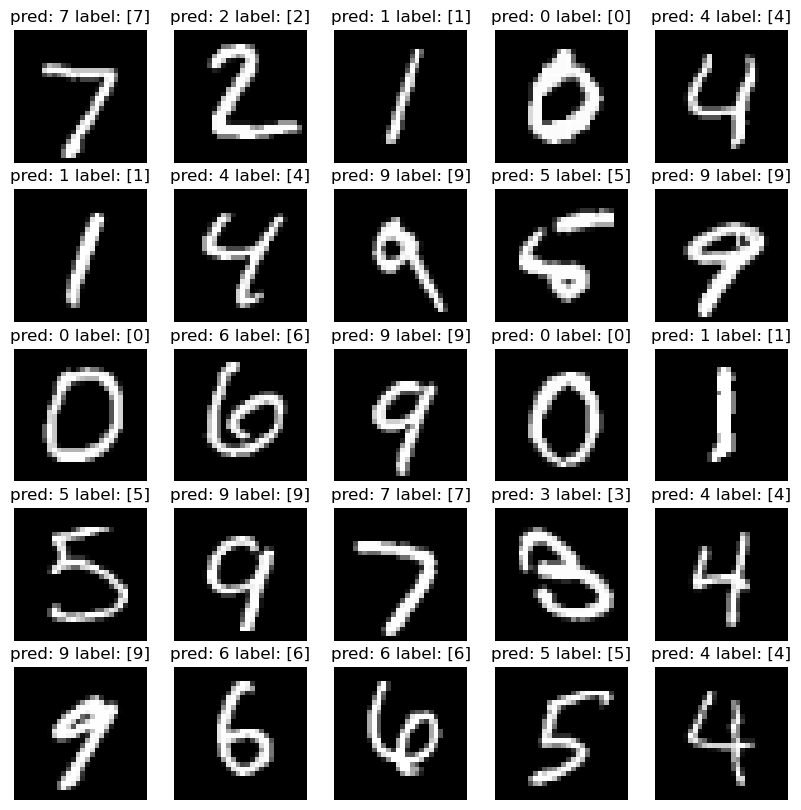

In [11]:
# plot
fig = plt.figure(figsize=(10, 10))

for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(np.squeeze(x_test[i]), cmap='gray')
    ax.set_title('pred: ' + str(np.argmax(y_pred[i])) + ' label: ' + str(y_test[i]))
    ax.axis('off')

plt.show()

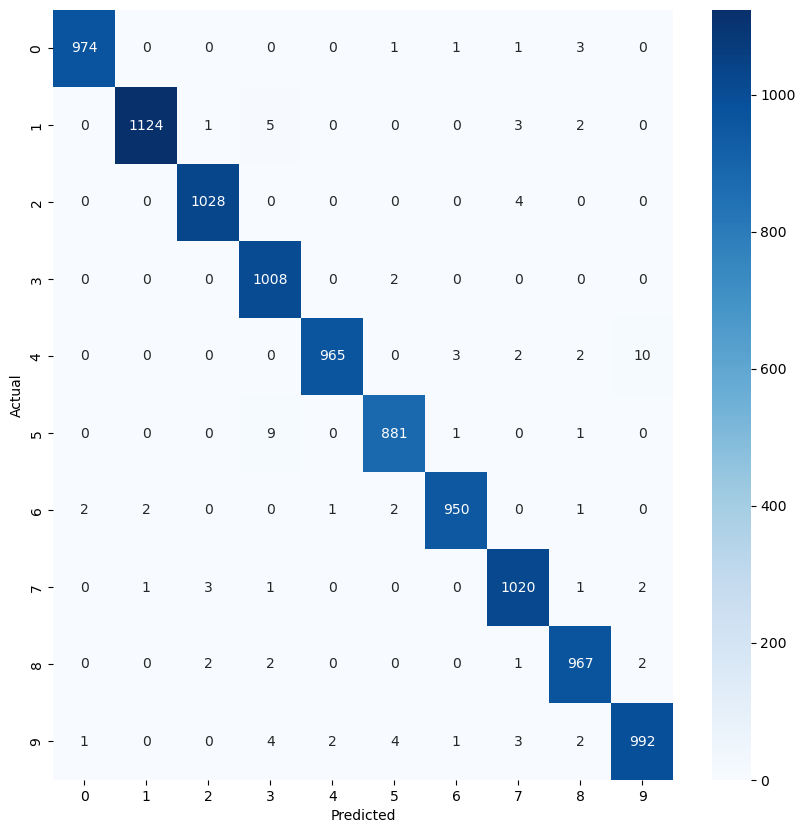

In [12]:
# confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()